# Histogramas, Binnings, and Densidad

Un simple histograma puede ser un gran primer paso para entender un conjunto de datos. ¡Veamos el poder de los histogramas!

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

data = np.random.randn(1000)

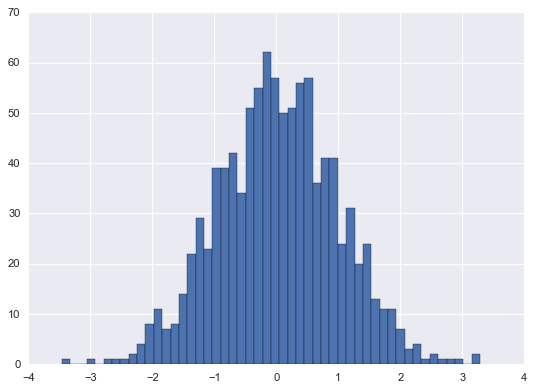

In [55]:
plt.hist(data,bins = 50);

La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la propia visualización; 
aquí hay un ejemplo de un histograma más personalizado:

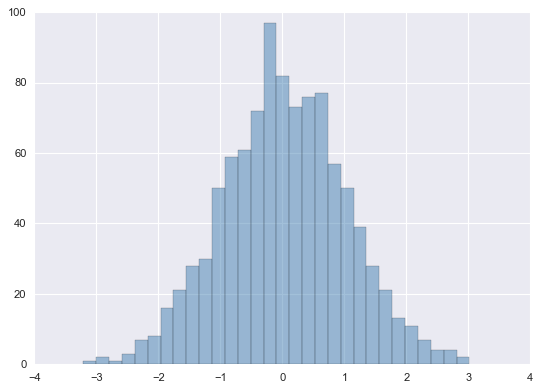

In [31]:
plt.hist(data,
         bins = 30,
        alpha = 0.5,
        color = 'steelblue');

El docstring ``plt.hist`` tiene más información sobre otras opciones de personalización disponibles.
El grado de transparencia ``alpha`` es muy útil cuando se comparan histogramas de varias distribuciones:

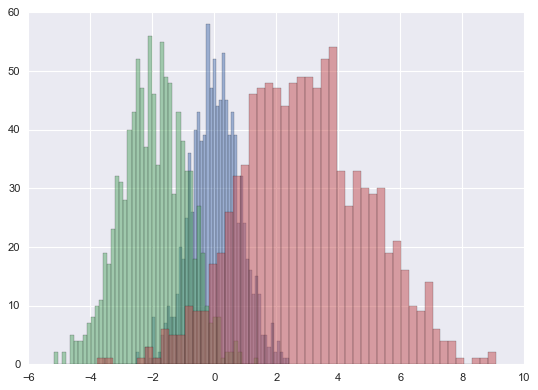

In [32]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(alpha = 0.5, bins = 50)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Si qioeres simplemente calcular el histograma (es decir, contar el número de puntos en una casilla determinada) y no mostrarlo, tenemos la función ``np.histogram()``:

In [33]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 22 204 461 272  41]


In [34]:
bin_edges

array([-3.20940143, -1.96418903, -0.71897662,  0.52623578,  1.77144819,
        3.01666059])

## Histogramas bidimensionales y Binnings

Al igual que creamos histogramas en una dimensión dividiendo la línea de números en intervalos, también podemos crear histogramas en dos dimensiones dividiendo los puntos entre intervalos bidimensionales.
Vamos a ver brevemente varias formas de hacerlo.
Empezaremos definiendo algunos datos una matriz de ``x`` e ``y`` extraída de una distribución gaussiana multivariante:

In [57]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

In [58]:
x

array([-0.76758632, -0.83810605, -0.70941368, ..., -0.4643994 ,
       -0.31037541, -0.71475847], shape=(10000,))

In [59]:
y

array([-1.40726618, -1.64785656, -1.00982588, ..., -0.11698177,
       -0.05439176, -0.88176369], shape=(10000,))

### ``plt.hist2d``: Histograma bidimensional

Una forma directa de trazar un histograma bidimensional es utilizar la función ``plt.hist2d`` de Matplotlib:

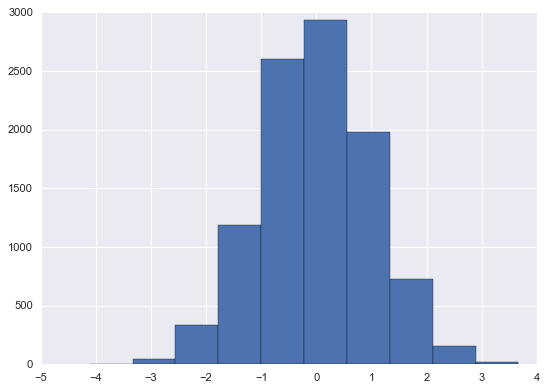

In [36]:
plt.hist(x, bins = 10);

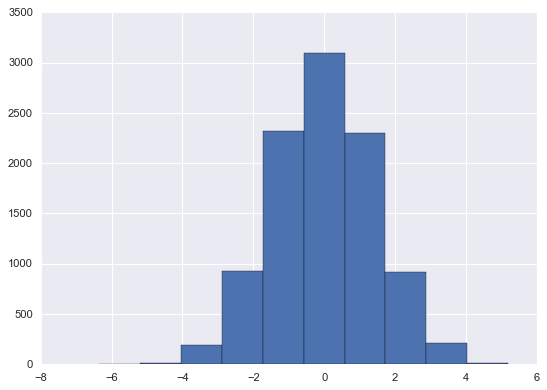

In [37]:
plt.hist(y, bins = 10);

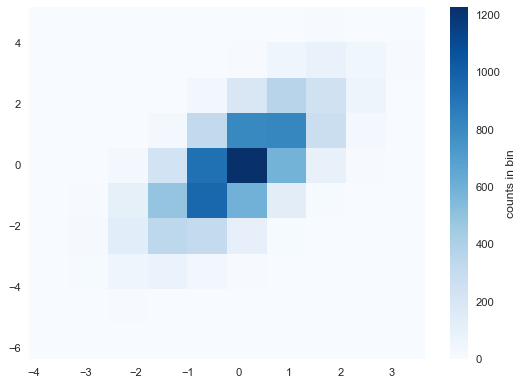

In [38]:
plt.hist2d(x, y, bins = 10, cmap = 'Blues');
cb = plt.colorbar()
cb.set_label('counts in bin');

Al igual que ``plt.hist``, ``plt.hist2d`` tiene una serie de opciones adicionales para ajustar el gráfico y el binning, que están muy bien descritas en el docstring de la función.
Además, al igual que ``plt.hist`` tiene una contrapartida en ``np.histogram``, ``plt.hist2d`` tiene una contrapartida en ``np.histogram2d``, que se puede utilizar como sigue:

In [39]:
print(x[1])
print(y[1])

0.8156845347156715
0.25130314527416536


In [40]:
counts, xedges, yedges = np.histogram2d(x, y, bins=10)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

### ``plt.hexbin``: Binnings Hexagonales

El histograma bidimensional crea una representación de cuadrados a través de los ejes.
Otra forma natural para tal representación es el hexágono regular.
Para este propósito, Matplotlib proporciona la rutina ``plt.hexbin``, que representará un conjunto de datos bidimensionales divididos en una cuadrícula de hexágonos:

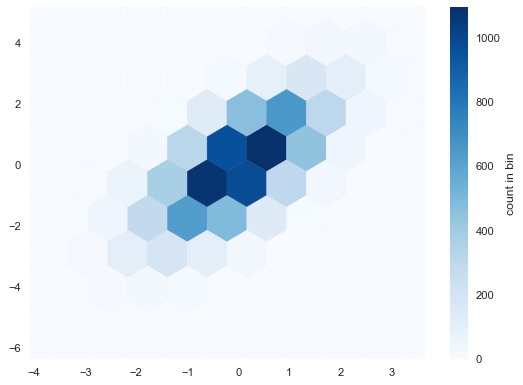

In [41]:
plt.hexbin(x, y, gridsize = 10, cmap = 'Blues')
cb = plt.colorbar(label='count in bin');

``plt.hexbin`` tiene un número de opciones interesantes, incluyendo la capacidad de especificar pesos para cada punto, y de cambiar la salida en cada bin a cualquier agregado de NumPy (media de pesos, desviación estándar de pesos, etc.).

# Personalización de las barras de colores

**Las leyendas de los gráficos identifican etiquetas discretas de puntos discretos.
Para las etiquetas continuas basadas en el color de los puntos, líneas o regiones, una barra de color etiquetada puede ser una gran herramienta.**
En Matplotlib, una barra de color es un eje separado que puede proporcionar una clave para el significado de los colores en un gráfico.
Comenzaremos configurando el notebook para trazar e importando las funciones que utilizaremos:

In [61]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [62]:
%matplotlib inline
import numpy as np

Como hemos visto varias veces a lo largo de esta sección, la barra de colores más sencilla se puede crear con la función ``plt.colorbar``:

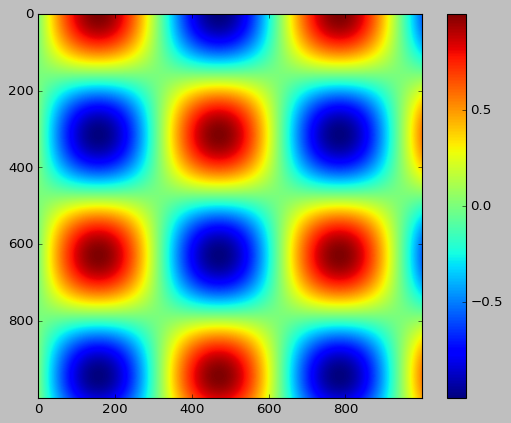

In [44]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

In [45]:
I.shape

(1000, 1000)

A continuación, discutiremos algunas ideas para personalizar estas barras de color y utilizarlas eficazmente en diversas situaciones.

## Personalización de las barras de color

El mapa de colores se puede especificar utilizando el argumento ``cmap`` a la función de trazado que está creando la visualización:

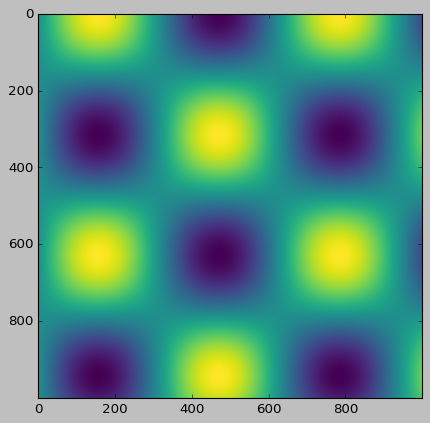

In [46]:
plt.imshow(I, cmap = 'viridis');

Todos los mapas de colores disponibles se encuentran en el espacio de nombres ``plt.cm``; si se utiliza la función de completar pestañas de IPython se obtendrá una lista completa de las posibilidades incorporadas:
```
plt.cm.<TAB>
```
Pero ser *capaz* de elegir un mapa de colores es sólo el primer paso: ¡más importante es cómo *decidir* entre las posibilidades!
La elección resulta ser mucho más sutil de lo que se podría esperar inicialmente.

### Elección del mapa de colores

Las pautas de elección del color dentro de la visualización está más allá del alcance de este notebook, un artículo bastante bueno es el siguiente; ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
La documentación en línea de Matplotlib también tiene una [interesante discusión](http://Matplotlib.org/1.4.1/users/colormaps.html) sobre la elección del mapa de colores.

A grandes rasgos, vamos a ver las tres categorías diferentes de mapas de colores:

- Mapa de color secuencial: Están formados por una secuencia continua de colores (por ejemplo, ``binario`` o ``viridis``).
- Mapas de colores divergentes: Suelen contener dos colores distintos, que muestran desviaciones positivas y negativas de una media (por ejemplo, ``RdBu`` o ``PuOr``).
- Mapas de colores cualitativos***: mezclan colores sin una secuencia determinada (por ejemplo, ``arco iris`` o ``chorro``).

El mapa de color ``jet``, que era el predeterminado en Matplotlib antes de la versión 2.0, es un ejemplo de mapa de color cualitativo.
Su status por defecto era bastante desafortunado, porque los mapas cualitativos son a menudo una mala elección para representar datos cuantitativos.
Uno de los problemas es el hecho de que los mapas cualitativos no suelen mostrar una progresión uniforme del brillo a medida que aumenta la escala.

Podemos comprobarlo convirtiendo la barra de colores ``jet`` en blanco y negro:

In [47]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

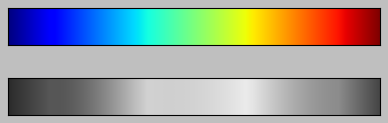

In [48]:
view_colormap(cmap='jet')

Date cuenta que las franjas brillantes en la imagen en escala de grises.
Incluso a todo color, este brillo desigual significa que el ojo será atraído a ciertas porciones de la gama de colores, lo que potencialmente enfatizará las partes no importantes del conjunto de datos.
Es mejor utilizar un mapa de color como ``viridis`` (el predeterminado a partir de Matplotlib 2.0), que está construido específicamente para tener una variación de brillo uniforme en toda la gama.
Por lo tanto, no sólo juega bien con nuestra percepción del color, sino que también se traducirá bien a la impresión en escala de grises:

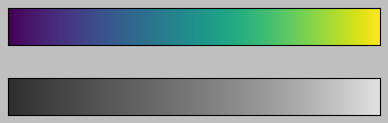

In [49]:
view_colormap('viridis')

Si te gustan los esquemas de arco iris, otra buena opción para los datos continuos es el mapa de colores ``cubehelix``:

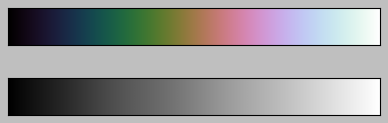

In [50]:
view_colormap('cubehelix')

Para otras situaciones, como mostrar las desviaciones positivas y negativas de alguna media, pueden ser útiles las barras de color de dos colores como ``RdBu`` (*Rojo-Azul*). Sin embargo, como puede ver en la siguiente figura, es importante tener en cuenta que la información positiva-negativa se perderá al pasar a escala de grises.

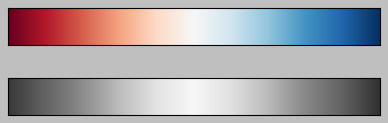

In [51]:
view_colormap('RdBu')

Veremos ejemplos de uso de algunos de estos mapas de color a medida que avancemos.

Hay un gran número de mapas de color disponibles en Matplotlib; para ver una lista de ellos, puedes usar IPython para explorar el submódulo ``plt.cm``.

### Límites de color y extensiones

Matplotlib permite una gran gama de personalización de la barra de colores.
La barra de colores es simplemente una instancia de ``plt.Axes``, por lo que todos los trucos de formato de ejes y trucos que hemos aprendido son aplicables.
La barra de colores tiene flexibilidad: por ejemplo, podemos estrechar los límites de color e indicar los valores fuera de los límites con una flecha triangular en la parte superior e inferior estableciendo la propiedad ``extend``.
Esto puede ser útil, por ejemplo, si se muestra una imagen que está sujeta a ruido:

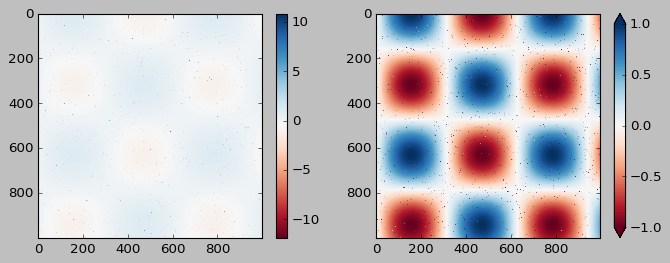

In [52]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both') # Triangular shape in color bar
plt.clim(-1, 1); # Fix the color edges

Observa que en el panel de la izquierda, los límites de color por defecto responden a los píxeles *ruidosos*, y el rango del ruido borra completamente el patrón que nos interesa.
En el panel de la derecha, fijamos manualmente los límites de color y añadimos extensiones para indicar los valores que están por encima o por debajo de esos límites.
El resultado es una visualización mucho más útil de nuestros datos.

### Barras de color discretas

Los mapas de color son por defecto continuos, pero a veces se desea representar valores discretos.
La forma más fácil de hacerlo es utilizar la función ``plt.cm.get_cmap()``, y pasar el nombre de un mapa de color adecuado junto con el número de intervalos deseados:

C:\Users\fer_r\AppData\Local\Temp\ipykernel_26612\2420005992.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


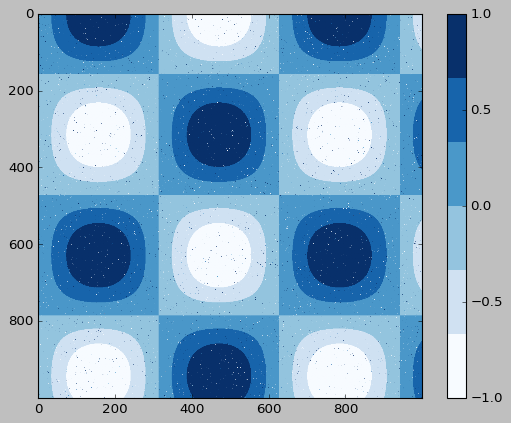

In [53]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

La versión discreta de un mapa de colores puede utilizarse como cualquier otro mapa de colores.